## Aritmética com matrizes NumPy

Matrizes são importantes porque permitem expressar operações em lote com dados
sem escrever nenhum para loops. Os usuários do NumPy chamam isso de vetorização. Qualquer aritmética
As operações entre matrizes de tamanho igual aplicam a operação em elementos:

In [1]:
import numpy as np

In [2]:
arr = np.array([[1,2,3],[4,5,6]])

In [3]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [5]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

Operações aritméticas com escalares propagam o argumento escalar para cada elemento em
a matriz:

In [6]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [7]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Comparações entre matrizes do mesmo tamanho produzem matrizes booleanas:

In [8]:
arr2 = np.array([[0.,4.,1.],[7.,2.,12.]])

In [9]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [10]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

As operações entre matrizes de tamanhos diferentes são chamadas de transmissão e serão discutidas
mais detalhadamente no Apêndice A. Ter uma compreensão profunda da transmissão é
não é necessário para a maior parte deste livro.

## Indexação básica e fatiamento

A indexação de array NumPy é um tópico interessante, pois há várias maneiras de selecionar
um subconjunto de seus dados ou elementos individuais. Matrizes unidimensionais são simples; em
Na superfície, eles agem de maneira semelhante às listas Python:

In [12]:
arr = np.arange(10)

In [13]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
arr[5]

5

In [15]:
 arr[5:8]

array([5, 6, 7])

In [16]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Como você pode ver, se você atribuir um valor escalar a uma fatia, como em arr [5: 8] = 12, o valor é
propagada (ou transmitida a partir de agora) para toda a seleção. Uma primeira distinção importante
das listas internas do Python é que as fatias da matriz são visualizações na matriz original.
Isso significa que os dados não são copiados e quaisquer modificações na exibição serão
refletido na matriz de origem.

Para dar um exemplo disso, primeiro criei uma fatia de arr:

In [17]:
arr_slice = arr[5:8] 

In [18]:
arr_slice

array([12, 12, 12])

Agora, quando altero os valores em arr_slice, as mutações são refletidas no original
matriz arr:

In [19]:
arr_slice[1] = 12345

In [20]:
arr_slice

array([   12, 12345,    12])

In [21]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [22]:
arr_slice[:] = 64

In [23]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

Se você é novo no NumPy, pode se surpreender com isso, principalmente se tiver usado
outras linguagens de programação de array que copiam os dados com mais entusiasmo. Como NumPy tem sido
projetado para funcionar com matrizes muito grandes, você pode imaginar o desempenho
e problemas de memória se o NumPy insistisse em sempre copiar dados.

Com matrizes dimensionais mais altas, você tem muito mais opções. Em um bidimensional
matriz, os elementos em cada índice não são mais escalares, mas sim unidimensionais
matrizes:

In [24]:
arrd2 = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [25]:
arrd2[2]

array([7, 8, 9])

Assim, elementos individuais podem ser acessados ​​recursivamente. Mas isso é um pouco demais
trabalho, para que você possa passar uma lista de índices separados por vírgula para selecionar elementos individuais.
Portanto, estes são equivalentes:

In [26]:
arrd2[0][2]

3

In [27]:
arrd2[0,2]

3

Veja a Figura para uma ilustração da indexação em uma matriz bidimensional. Eu acho isso
É útil pensar no eixo 0 como as "linhas" da matriz e no eixo 1 como as "colunas".

In [30]:
from IPython.display import Image

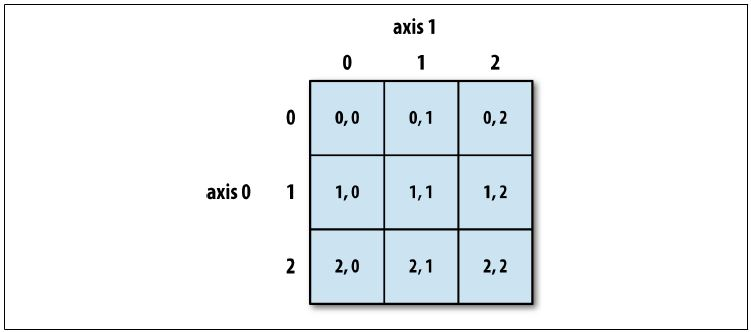

In [40]:
Image('figura.jpg',width = 500)

Em matrizes multidimensionais, se você omitir índices posteriores, o objeto retornado será um
ndarray dimensional inferior que consiste em todos os dados ao longo das dimensões superiores. assim
na matriz 2 × 2 × 3 arr3d:

In [41]:
arrd3 = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arrd3

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [42]:
arrd3[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [43]:
old_value = arrd3[0].copy()

In [44]:
arrd3[0] = 42
arrd3

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [45]:
arrd3[0] = old_value
arrd3

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Da mesma forma, arr3d [1, 0] fornece todos os valores cujos índices começam com (1, 0),
formando uma matriz unidimensional:

In [46]:
arrd3[1,0]

array([7, 8, 9])

In [47]:
x = arrd3[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [48]:
x[0]

array([7, 8, 9])

### Indexando com fatias

Como objetos unidimensionais, como listas Python, os ndarrays podem ser fatiados com o
sintaxe familiar:

In [49]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [50]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

Considere a matriz bidimensional de antes, arr2d. Fatiar esta matriz é um pouco
diferente:

In [51]:
arrd2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [52]:
arrd2[:2]

array([[1, 2, 3],
       [4, 5, 6]])